In [60]:
###Importing required libraries
import quandl
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Download daily price data for each of the stocks in the portfolio
bajaj=quandl.get("NSE/BAJFINANCE.5")
jsw=quandl.get("NSE/JSWSTEEL.5")
maruti=quandl.get("NSE/MARUTI.5")
tcs=quandl.get("NSE/TCS.5")
hul=quandl.get("NSE/HINDUNILVR.5")
nifty=quandl.get("NSE/CNX_NIFTY")

In [74]:
data = pd.concat([bajaj, jsw,maruti,tcs,hul], axis=1, join='inner')
data.columns = ['bajaj','jsw','maruti','tcs','hul']
data.sort_index(inplace=True)
data.head()
data.tail()

,bajaj,jsw,maruti,tcs,hul
Date,,,,,
2018-10-26,2338.90,337.45,6717.30,1799.10,1558.25
2018-10-29,2380.45,340.00,6798.70,1871.00,1552.90
2018-10-30,2356.35,335.80,6697.00,1894.80,1593.05
2018-10-31,2382.55,339.40,6616.40,1938.15,1621.70
2018-11-01,2418.10,342.75,6711.75,1935.75,1607.65
2018-11-02,2383.30,352.80,7135.45,1913.45,1638.45
2018-11-05,2359.40,353.65,7177.25,1890.85,1640.05
2018-11-06,2339.75,350.75,7075.00,1932.70,1631.95
2018-11-07,2348.40,351.65,7127.90,1942.15,1643.85


In [233]:
#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return,std dev and covariance of daily returns
mean_daily_returns = returns.mean()
return_stdev = returns.std()
cov_matrix = returns.cov()

#calculate annualised expected return and std deviation for each stock and the portfolio.
annualised_return = round(mean_return * 252,2)
annualised_stdev = round(return_stdev * np.sqrt(252),2)

#set array holding portfolio weights of each stock
weights = np.asarray([0.5,0.2,0.1,0.1,0.1])
 
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
returns.head()

,bajaj,jsw,maruti,tcs,hul
Date,,,,,
2010-09-29,NaN,NaN,NaN,NaN,NaN
2010-09-30,-0.001356,0.006491,0.007587,0.007171,0.009967
2010-10-01,0.001810,0.027785,0.027101,0.037381,0.002103
2010-10-04,0.010904,0.015688,0.000135,-0.006032,-0.003713
2010-10-05,-0.005617,-0.010920,0.015674,-0.005807,-0.014746


In [1]:
# # We have to take the percent changes to get to returns hence we will use .pct_change()
# # We do not want the first (0th) element because it is NAN

# return_bajaj = data.bajaj.pct_change()[1:]
# return_jsw = data.jsw.pct_change()[1:]
# return_maruti = data.maruti.pct_change()[1:]
# return_tcs = data.tcs.pct_change()[1:]
# return_hul = data.hul.pct_change()[1:]

# # We will plot the returns of Portfolio Stocks
# plt.figure(figsize=(20,10))
# return_bajaj.plot()
# return_jsw.plot()
# return_maruti.plot()
# return_tcs.plot()
# return_hul.plot()
# plt.ylabel("Daily Return of portfolio stocks")
# plt.show()


In [247]:
data.to_csv("file_name1.csv", sep='\t')

In [56]:
annualised_return

bajaj     0.37
jsw       0.08
maruti    0.24
tcs       0.15
hul       0.24
dtype: float64

In [57]:
annualised_stdev

bajaj     0.46
jsw       0.49
maruti    0.27
tcs       0.31
hul       0.23
dtype: float64

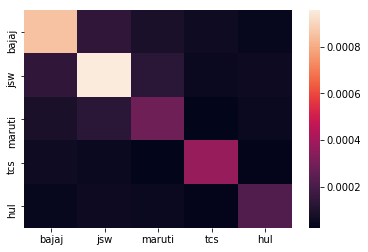

In [61]:
# plot the heatmap
sns.heatmap(cov_matrix, 
        xticklabels=cov_matrix.columns,
        yticklabels=cov_matrix.columns)

In [62]:
portfolio_return

0.26

In [63]:
portfolio_std_dev

0.28

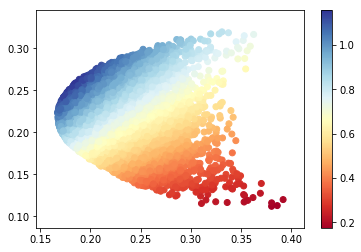

In [68]:
#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))
rf=0.045

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate = 4.5 %
    results[2,i] = (results[0,i] - rf)/ results[1,i]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

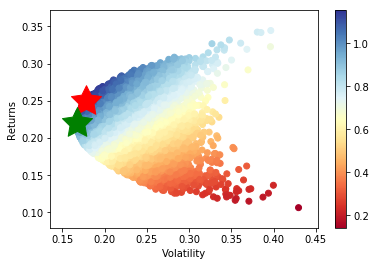

In [69]:
#set number of runs of random portfolio weights
num_portfolios = 25000
stocks = ['bajaj','jsw','maruti','tcs','hul']
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate, rf = 4.5%
    results[2,i] = (results[0,i] - rf )/ results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
 
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [70]:
print(max_sharpe_port)

ret       0.249745
stdev     0.177526
sharpe    1.153319
bajaj     0.165715
jsw       0.007733
maruti    0.250719
tcs       0.113632
hul       0.462201
Name: 7636, dtype: float64


In [71]:
print(min_vol_port)

ret       0.220567
stdev     0.167547
sharpe    1.047867
bajaj     0.043749
jsw       0.026594
maruti    0.276894
tcs       0.223712
hul       0.429051
Name: 12347, dtype: float64


In [79]:
nifty=quandl.get("NSE/CNX_NIFTY.4")

In [80]:
nifty.tail(10)

,Close
Date,
2018-10-26,10030.00
2018-10-29,10250.85
2018-10-30,10198.40
2018-10-31,10386.60
2018-11-01,10380.45
2018-11-02,10553.00
2018-11-05,10524.00
2018-11-06,10530.00
2018-11-07,10598.40


In [147]:
# import statsmodels.api as sm
# from statsmodels import regression
linear = pd.concat([nifty,bajaj, jsw,maruti,tcs,hul], axis=1, join='inner')
linear.columns = ['nifty','bajaj','jsw','maruti','tcs','hul']

# X = linear['nifty']
# y = linear['hul']

# def linreg(x,y):

#     x = sm.add_constant(x)
#     model = regression.linear_model.OLS(y,x).fit()
 
#     # We are removing the constant
#     x = x[:, 1]
#     return model.params[0], model.params[1]

# alpha, beta = linreg(X,Y)
# print ('alpha:' + str(alpha))
# print ('beta: ' + str(beta))

# alternatively scipy linear regression
# from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# print(1-slope)
linear.tail(10)

,nifty,bajaj,jsw,maruti,tcs,hul
Date,,,,,,
2018-10-26,10030.00,2338.90,337.45,6717.30,1799.10,1558.25
2018-10-29,10250.85,2380.45,340.00,6798.70,1871.00,1552.90
2018-10-30,10198.40,2356.35,335.80,6697.00,1894.80,1593.05
2018-10-31,10386.60,2382.55,339.40,6616.40,1938.15,1621.70
2018-11-01,10380.45,2418.10,342.75,6711.75,1935.75,1607.65
2018-11-02,10553.00,2383.30,352.80,7135.45,1913.45,1638.45
2018-11-05,10524.00,2359.40,353.65,7177.25,1890.85,1640.05
2018-11-06,10530.00,2339.75,350.75,7075.00,1932.70,1631.95
2018-11-07,10598.40,2348.40,351.65,7127.90,1942.15,1643.85


# Calculating Beta(β) & R-Square

In [191]:
linear = pd.concat([nifty,bajaj, jsw,maruti,tcs,hul], axis=1, join='inner')
linear.columns = ['nifty','bajaj','jsw','maruti','tcs','hul']
linear.sort_index(inplace=True)

#convert daily stock prices into daily returns
beta = linear.pct_change()

# #calculate variance of daily nifty returns
return_nifty_var = beta["nifty"].var()
# annualised_nifty_var = round(return_nifty_var * 252,2)
# annualised_nifty_var

##Covariance of stock with respect to nifty index
df = pd.DataFrame(beta.iloc[773:])
df_cov=df.cov()

#Correlation of stock 
df_corr=df.corr(method='pearson', min_periods=1)

0.024139963161143026

In [203]:
def beta(name):
    bt=df_cov.iloc[0][name]/(return_nifty_var)
    rsqu=df_corr.iloc[0][name]
    return bt,rsqu

In [205]:
beta_hul=beta("hul")
beta_hul

(0.41714891065489457, 0.3483962446820451)

In [224]:
jatin=pd.read_csv("jatin.csv")
beta=jatin

# #calculate variance of daily nifty returns
return_nifty_var = beta["NIFTY"].var()
# annualised_nifty_var = round(return_nifty_var * 252,2)
# annualised_nifty_var

##Covariance of stock with respect to nifty index
df = pd.DataFrame(beta)
df_cov=df.cov()

#Correlation of stock 
df_corr=df.corr(method='pearson', min_periods=1)
df_corr

def beta(name):
    bt=df_cov.iloc[0][name]/(return_nifty_var)
    rsqu=df_corr.iloc[0][name]
    return bt,rsqu
df.head()

,NIFTY,Hindalco,Hero MotoCorp Ltd,Bajaj Auto Ltd,Maruti Suzuki India Ltd,Mahindra & Mahindra Ltd,Eicher Motors Ltd,Tata Motors Ltd,Yes Bank Ltd,Axis Bank Ltd
0,0.0185,-0.0156,-0.0042,0.0147,-0.0120,0.0263,0.0399,0.0104,0.0332,0.0350
1,-0.0051,-0.0011,0.0087,0.0028,-0.0150,-0.0043,-0.0203,0.0108,0.0041,-0.0071
2,0.0220,0.0131,0.0164,0.0141,0.0121,0.0293,-0.0158,0.0407,0.0033,0.0539
3,-0.0094,-0.0049,0.0038,0.0146,-0.0009,-0.0076,-0.0129,0.0191,-0.0890,-0.0416
4,-0.0098,-0.0326,-0.0024,0.0010,-0.0067,-0.0034,-0.0235,-0.0311,-0.0277,-0.0054


In [227]:
df_cov.iloc[0]["Hero MotoCorp Ltd"]
return_nifty_var

7.22362775434216e-05

In [230]:
beta_hul=beta("Maruti Suzuki India Ltd")
beta_hul

(1.0118389206535827, 0.5614644265323151)